In [2]:
import pandas as pd

In [3]:
sentences = pd.read_csv('data/demo_data_real.csv')
sentence = sentences.iloc[1]['Original Text']
sentence

'Hallo Marcel, hier noch eine kurze Info für dich: Du kannst maximal 3 Urlaubstage mit ins nächste Jahr nehmen. Alle anderen Urlaubstage sollten bis Ende des Jahres verplant sein.'

# General Preprocessing

In [4]:
sentences.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

In [5]:
sentences

,ID,Bereinigter Text,Tags/Kategorie,Eingereicht von,Original Text
0,1,Die Tabelle “Subscriptions” im Schema “CRM” en...,"DWH, SQL",NaN,"Hey, du kannst die Tabelle “Subscriptions” im ..."
1,2,Maximal 3 Urlaubstage mit ins nächste Jahr neh...,HR,NaN,"Hallo Marcel, hier noch eine kurze Info für di..."
2,3,CR bedeutet Conversion Rate.,"Allgemeine Definitionen, CRM",NaN,"Hi Marcel, CR bedeutet in unserem Kontext Conv..."
3,4,AE bedeutet Account Executive.,"Allgemeine Definitionen, CRM",NaN,"AE = Account Executive, also Sales Mitarbeiter..."
4,5,Mit “Abrechnungsdatum” ist das Attribut “Purch...,"Allgemeine Definitionen, DWH",NaN,"Hi Marcel, ja genau mit “Abrechnungsdatum” ist..."
5,6,Die gebuchten Addons sind in der Tabelle “Subs...,"DWH, SQL",NaN,"Hey Marcel, die gebuchten Addons findest du in..."
6,7,"""Deactivated Date” steht für den Zeitpunkt, wa...","Allgemeine Definitionen, CRM",NaN,"Hi, das Attribut “Deactivated Date” steht für ..."
7,8,"Die wichtigsten Tabellen sind “Owners”, “Subsc...","CRM, DWH",NaN,"Hey Marcel, erstmal noch eine kurze Info für d..."
8,9,Mit dem Datenintegrationstool Stitch können wi...,DWH,NaN,"Hey Marcel, ich weiß nicht, ob du das Tool Sti..."
9,10,Als Werkstudent ist der Abrechnungszeitraum fü...,HR,NaN,"Hi Marcel, eine kurze Info noch für dich: Als ..."


# Manual Categorization

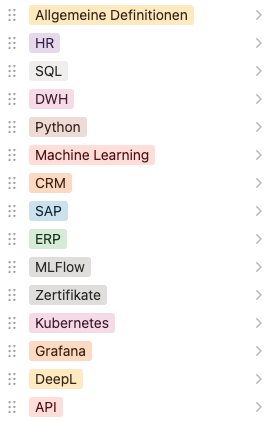

## Keywords

- Allgemeine Definitionen:
    - bedeutet
    - =
    - gemeint
    - steht für

- HR:
    - Urlaub
    - Urlaubstage
    - Abrechnung
    - Abrechnungszeitraum
    - Stunden
    - Kostenstelle
    - Einkauf
    - Nutzer

- SQL:
    - Tabelle/Tabellen
    - SQL
    - Query
    - Queries
    - Daten
    - Attribut
    - Spalte
    - Merkmal
    - Schema

- DWH:
    - Tabelle/Tabellen
    - SQL
    - Query
    - Queries
    - Daten
    - Attribut
    - Spalte
    - Merkmal
    - Schema
    - Ebene
    - DWH
    - Data Warehouse
    - PostgreSQL
    - Daten
    - Feld/Felder

- Python:
    - Feature
    - Engineering
    - Modell
    - Python
    - klassifizieren
    - klassifiziert
    
- Machine Learning:
    - Feature
    - Engineering
    - Modell
    - Python
    - klassifizieren
    - klassifiziert

- CRM:
    - CRM
    - Sales
    - Deal
    - Stage
    - Kunde/Kunden
    - Vertrag

- SAP:
    - SAP
    - IDOC
    - Berechtigung/Berechtigungen

- ERP:
    - ERP
    - MARA
    - MARC
    - Material/Materialien

- MLFlow:
    - MLFlow

- Zertifikate:
    - Zertifikat/Zertifikate

- Kubernetes:
    - Kubernetes
    - Namespace
    - d-bru
    - p-bru
    - Ranger
    - Harbor

- Grafana:
    - Grafana

- DeepL:
    - DeepL
    - DeepL-Api
    - Übersetzung

- API:
    - API



In [4]:
# Create dict with relevant keywords

keywords_dict = {
    "Allgemeine Definitionen": ["bedeutet", "gleich", "gemeint", "steht für"],
    "HR": ["urlaub", "urlaubstage", "abrechnung", "abrechnungszeitraum", "stunden", "kostenstelle", "einkauf", "nutzer", "pe-as"],
    "SQL": ["tabelle", "tabellen", "sql", "query", "queries", "daten", "attribut", "spalte", "merkmal", "schema"],
    "DWH": ["tabelle", "tabellen", "sql", "query", "queries", "daten", "attribut", "spalte", "merkmal", "schema", "ebene", "dwh", "data warehouse", "postgresql", "daten", "feld", "felder"],
    "Python": ["feature", "engineering", "modell", "python", "klassifizieren", "klassifiziert"],
    "Machine Learning": ["feature", "fngineering", "modell", "python", "klassifizieren", "klassifiziert"],
    "CRM": ["crm", "sales", "deal", "kunde", "kunden", "vertrag"],
    "SAP": ["sap", "idoc", "berechtigung", "berechtigungen"],
    "ERP": ["erp", "mara", "marc", "material", "materialien"],
    "MLFlow": ["mlflow"],
    "Zertifikate": ["zertifikat"],
    "Kubernetes": ["kubernetes", "namespace", "d-bru", "p-bru", "ranger", "harbor"],
    "Grafana": ["grafana"],
    "DeepL": ["deepL", "deepL-api", "übersetzung"],
    "API": ["api"]    
}

Code for single text

In [8]:
sentence = "Hey, du kannst die Tabelle “Subscriptions” im Schema “CRM” benutzen. Dort sind alle Daten zu den Abonnements enthalten."

In [10]:


keywords, categories = get_keywords(sentence, keywords_dict)  

print(keywords)
print(categories)

['crm', 'schema', 'daten', 'tabelle']
['CRM', 'SQL', 'DWH']


Code for whole df

In [ ]:
sentences.head()

In [5]:
# Function - returns all keys of dict that correspond to a given value

def corresponding_keys(val, dictionary):
        val = val.lower()
        keys = []
        for k, v in dictionary.items():
            if val in v:
                keys.append(k)
        return keys
    
corresponding_keys("feature", keywords_dict)

['Python', 'Machine Learning']

In [9]:
# Function - returns all matching categories of a given text based on keywords defined in dict before

def get_keywords(df, d):  # input: sentences, keywords_dict
    all_keywords = []
    all_cats = []
    
    for index, row in df.iterrows():  # iterate over each entry in column Original Text
        keywords = []
        cats = []
        
        for key, value in d.items():  
            
            for word in value:
                
                if word.lower() in row["Bereinigter Text"].lower():
                    add = corresponding_keys(word, d)
                    
                    if add not in cats:
                        cats.append(add)

        all_cats.append(cats)
        
    return all_cats
                    

all_keywords = get_keywords(sentences, keywords_dict)
all_keywords

[[['SQL', 'DWH'], ['CRM']],
 [['HR']],
 [['Allgemeine Definitionen']],
 [['Allgemeine Definitionen']],
 [['Allgemeine Definitionen'], ['HR'], ['SQL', 'DWH'], ['DWH']],
 [['SQL', 'DWH']],
 [['Allgemeine Definitionen'], ['CRM']],
 [['SQL', 'DWH']],
 [['SQL', 'DWH'], ['DWH']],
 [['HR']],
 [['SAP'], ['ERP']],
 [['MLFlow'], ['Zertifikate']],
 [['Kubernetes'], ['API']],
 [['Kubernetes'], ['Grafana']],
 [[], ['API']],
 [['SQL', 'DWH'], ['DWH'], ['ERP']],
 [['ERP']],
 [['DWH'], ['SAP']],
 [['SQL', 'DWH'], ['DWH']],
 [['SQL', 'DWH'], ['ERP']],
 [['HR']],
 [['SQL', 'DWH'], ['Python', 'Machine Learning'], ['Python']],
 [['HR']],
 [['Python', 'Machine Learning'], ['ERP']],
 [['Kubernetes']],
 [['SAP']],
 [['HR']]]

In [10]:
# Function - removes list of lists of lists and stores all matching categories of a given text in a single list

def unpack_lists(l):
    all_categories = []
    
    for first_layer in l:
        row_categories = []
        
        for second_layer in first_layer:
            for el in second_layer:
                if el not in row_categories:
                    row_categories.append(el)
        all_categories.append(row_categories)   
        
    return all_categories
          
    
unpack_lists(all_keywords)

[['SQL', 'DWH', 'CRM'],
 ['HR'],
 ['Allgemeine Definitionen'],
 ['Allgemeine Definitionen'],
 ['Allgemeine Definitionen', 'HR', 'SQL', 'DWH'],
 ['SQL', 'DWH'],
 ['Allgemeine Definitionen', 'CRM'],
 ['SQL', 'DWH'],
 ['SQL', 'DWH'],
 ['HR'],
 ['SAP', 'ERP'],
 ['MLFlow', 'Zertifikate'],
 ['Kubernetes', 'API'],
 ['Kubernetes', 'Grafana'],
 ['API'],
 ['SQL', 'DWH', 'ERP'],
 ['ERP'],
 ['DWH', 'SAP'],
 ['SQL', 'DWH'],
 ['SQL', 'DWH', 'ERP'],
 ['HR'],
 ['SQL', 'DWH', 'Python', 'Machine Learning'],
 ['HR'],
 ['Python', 'Machine Learning', 'ERP'],
 ['Kubernetes'],
 ['SAP'],
 ['HR']]

Diese Liste von Listen muss nun an den Original df gejoint werden -> Endergebnis: Zu jedem Text hat man dann in einer neuen Spalte alle Kategorien zu den Keywords, die hardkodiert in dem Dictionary keywords_dict definiert sind und in dem jeweiligen Text vorgekommen sind.

In [12]:
# Function - returns all categories for every keyword appearing in dict from before (not necessarily needed)

def get_categories(keywords):
    for l in all_keywords:
        for word in l:
            print(word, corresponding_keys(word, keywords_dict))
        

all_categories = get_categories(all_keywords)
all_categories

AttributeError: 'list' object has no attribute 'lower'